### Notebook for the Udacity Project "Write A Data Science Blog Post"

#### Dataset used: "TripAdvisor Restaurants Info for 31 Euro-Cities"
https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw
https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw/downloads/krakow-ta-restaurans-data-raw.zip/5

In [35]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
# Load in dataset

data_raw = pd.read_csv("TA_restaurants_curated.csv")

In [3]:
# Having a first look at the data

data_raw.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [4]:
data_raw.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


In [193]:
# Which cities are included in the dataset?

cities = data_raw.City.unique()
cities

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava',
       'Brussels', 'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh',
       'Geneva', 'Hamburg', 'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana',
       'London', 'Luxembourg', 'Lyon', 'Madrid', 'Milan', 'Munich',
       'Oporto', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm', 'Vienna',
       'Warsaw', 'Zurich'], dtype=object)

In [194]:
# Manually add the name of the local cuisines into an array (needed for RQ3)

local_cuisine = ['Dutch', 'Greek', 'Spanish', 'German', 'Eastern European', 'Belgian', 'Hungarian', 'Danish', 'Irish', 'Scottish', 'Swiss', 'German', 'Scandinavian', 'Polish', 'Portuguese', 'Slovenian', 'British', 'European', 'French', 'Spanish', 'Italian', 'German', 'Portuguese', 'Norwegian', 'French', 'Czech', 'Italian', 'Swedish', 'Austrian', 'Polish', 'Swiss']

As I live in Munich, I will want to have a closer look on the data for the city of Munich. So I will filter for the Munich data and have a first look on it.

In [139]:
# Filter for Munich data and have a first look.

data_raw_munich = data_raw[(data_raw.City == "Munich")]
data_raw_munich.head(10)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
83609,0,Broeding,Munich,"['Austrian', 'European', 'Central European', '...",1.0,4.5,$$$$,812.0,"[['Amazing!', 'Fantastic food'], ['12/02/2017'...",/Restaurant_Review-g187309-d692576-Reviews-Bro...,d692576
83610,1,Schwarzreiter Tagesbar & Restaurant,Munich,"['German', 'European', 'Diner', 'Central Europ...",2.0,4.5,$$$$,745.0,"[['Gluten-free accommodation', 'Restaurant'], ...",/Restaurant_Review-g187309-d7736677-Reviews-Sc...,d7736677
83611,2,Naxos Taverna,Munich,"['Seafood', 'Mediterranean', 'Greek', 'Grill',...",3.0,4.5,$$ - $$$,705.0,"[['!!!!!Great dinner experience!!!', 'Wow!'], ...",/Restaurant_Review-g187309-d2660543-Reviews-Na...,d2660543
83612,3,Mariannenhof,Munich,"['German', 'Bar', 'European', 'Vegetarian Frie...",4.0,4.5,$$ - $$$,267.0,"[['Mariannenhof - Taste of Bavaria', 'Tasty & ...",/Restaurant_Review-g187309-d1344151-Reviews-Ma...,d1344151
83613,4,Taverna Limani,Munich,"['Seafood', 'Mediterranean', 'European', 'Gree...",5.0,4.5,$$ - $$$,631.0,"[['Great greek food!', 'My favourite place to ...",/Restaurant_Review-g187309-d6638510-Reviews-Ta...,d6638510
83614,5,Savanna,Munich,"['Steakhouse', 'International', 'African', 'Ve...",6.0,4.5,$$ - $$$,371.0,"[['Excellent Food!', 'Dinner - first night in ...",/Restaurant_Review-g187309-d2656918-Reviews-Sa...,d2656918
83615,6,Servus Heidi,Munich,"['German', 'European', 'Central European', 'Ve...",7.0,4.5,$$ - $$$,273.0,"[['Oh Heidi', 'Modern interpretation of Standa...",/Restaurant_Review-g187309-d12448146-Reviews-S...,d12448146
83616,7,Thalassa,Munich,"['Mediterranean', 'European', 'Vegetarian Frie...",8.0,4.5,$$ - $$$,579.0,"[['Perfect', 'Good and relaxed dinner'], ['01/...",/Restaurant_Review-g187309-d7046654-Reviews-Th...,d7046654
83617,8,Little London Bar& Grill,Munich,"['Steakhouse', 'Seafood', 'European', 'Vegetar...",9.0,4.5,$$$$,557.0,"[['Very good steakhouse!', 'Warm and cosy'], [...",/Restaurant_Review-g187309-d8088331-Reviews-Li...,d8088331
83618,9,Thalassa,Munich,"['Seafood', 'Mediterranean', 'European', 'Gree...",10.0,4.5,$$ - $$$,299.0,"[['Good Greek restaurant', 'Great atmosphere a...",/Restaurant_Review-g187309-d3746214-Reviews-Th...,d3746214


In [140]:
data_raw_munich.tail(10)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
86594,2985,Sweet Monkeys - Pures Eisvergnugen,Munich,['Cafe'],NaN,NaN,$$$$,NaN,NaN,/Restaurant_Review-g187309-d13314647-Reviews-S...,d13314647
86595,2986,An An Vietnamese Cuisine,Munich,['Vietnamese'],NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g187309-d13324570-Reviews-A...,d13324570
86596,2987,Vina Wok Restaurant,Munich,"['Asian', 'Vietnamese']",NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g187309-d13329404-Reviews-V...,d13329404
86597,2988,Leopardi Bar,Munich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g187309-d13330107-Reviews-L...,d13330107
86598,2989,Melina Merkouri,Munich,"['Seafood', 'Mediterranean', 'Greek']",NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g187309-d13341371-Reviews-M...,d13341371
86599,2990,Burger & Steakbar,Munich,"['American', 'Steakhouse']",NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g187309-d13342356-Reviews-B...,d13342356
86600,2991,Leopardi Bar,Munich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g187309-d13350138-Reviews-L...,d13350138
86601,2992,HeimWerk,Munich,"['German', 'Bar', 'Pub', 'Diner']",NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g187309-d13351838-Reviews-H...,d13351838
86602,2993,Gasthaus Domagk,Munich,"['German', 'Austrian', 'Cafe', 'International'...",NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g187309-d13352398-Reviews-G...,d13352398
86603,2994,Bar Elf,Munich,"['Italian', 'Bar', 'Cafe', 'Pub']",NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g187309-d13358312-Reviews-B...,d13358312


In [141]:
data_raw_munich.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,2995.000000,2744.000000,2743.000000,2545.000000
mean,1497.000000,1382.638484,4.027525,84.881336
std,864.726354,797.783812,0.617095,387.046727
min,0.000000,1.000000,-1.000000,2.000000
25%,748.500000,693.750000,3.500000,9.000000
50%,1497.000000,1383.500000,4.000000,29.000000
75%,2245.500000,2073.250000,4.500000,73.000000
max,2994.000000,2764.000000,5.000000,16478.000000


## Research Questions:

- RQ 1: Are there differences in average ratings and number of ratings between cities?
- RQ 2: Are there more vegetarian-friendly cities and if so, are they locally concentrated?
- RQ 3: Is local cuisine rated better than foreign cusine and if so, is there a difference between cities?

### Calculate the data for RQ 1 - 3

In [174]:
# Loop through entries for each city

# Create empty lists
num_entries = []
num_rated = []
perc_rated = []
avg_num_ratings = []
avg_rating = []
avg_veg_available = []
avg_loc_available = []
avg_loc_rating = []
avg_non_loc_rating = []
diff_loc_rating = []
total_local_rating = []
total_non_local_rating = []

# Initialize city number
n_city = -1

for city in cities:
    n_city = n_city + 1
    
    # Compute Data for RQ1
    # Select data for one city
    data_1city = data_raw[(data_raw.City == city)]
    ratings = data_1city.Rating
    data_1city_non_NaN = data_1city[data_1city['Rating'].notnull()]
    ratings_non_NaN = data_1city_non_NaN.Rating
    
    # Compute Data for RQ2 & RQ3
    # Initialize lists for the current city
    veg_available = []
    loc_available = []
    rating_local = []
    rating_non_local = []
    data_1city_stl_non_Nan = data_1city[data_1city['Cuisine Style'].notnull()]
    # Iterate through every restaurant and check if they offer vegetarian/vegan food.
    for i in range(len(data_1city_stl_non_Nan)):
        veg_true = 0
        styles = data_1city_stl_non_Nan.iloc[i, 3]
        if 'Vegetarian' in styles:
            veg_true = 1
            #print('Veg Found')
        elif 'Vegan' in styles:
            veg_true = 1
        veg_available.append(veg_true)
        
        # For RQ3 check if the current restaurant offers local food and add the rating to the respective list.
        loc_true = 0
        if local_cuisine[n_city] in styles:
            loc_true = 1
            if ~np.isnan(data_1city_stl_non_Nan.iloc[i, 5]):
                rating_local.append(data_1city_stl_non_Nan.iloc[i, 5])
                total_local_rating.append(data_1city_stl_non_Nan.iloc[i, 5])
        else:
            if ~np.isnan(data_1city_stl_non_Nan.iloc[i, 5]):
                rating_non_local.append(data_1city_stl_non_Nan.iloc[i, 5])
                total_non_local_rating.append(data_1city_stl_non_Nan.iloc[i, 5])
            
        loc_available.append(loc_true) 
       
            
    
    # Add to lists / caluclate aggregated values
    num_entries.append(len(data_1city))
    num_rated.append(len(data_1city_non_NaN))
    perc_rated.append(len(data_1city_non_NaN) / len(data_1city))
    avg_num_ratings.append(np.mean(data_1city_non_NaN['Number of Reviews']))
    avg_rating.append(np.mean(data_1city_non_NaN['Rating']))
    avg_veg_available.append(np.mean(veg_available))
    avg_loc_available.append(np.mean(loc_available))
    avg_loc_rating.append(np.mean(rating_local))
    avg_non_loc_rating.append(np.mean(rating_non_local))
    diff_loc_rating.append(np.mean(rating_local) - np.mean(rating_non_local))
    
    
# Create Dataframe
data_RQ1 = pd.DataFrame({'City': cities, 'Local_Cuisine': local_cuisine, 'Num_Entries': num_entries, 'Num_Rated': num_rated, 'Perc_Rated': perc_rated, 'Avg_Num_Ratings': avg_num_ratings, 'Avg_Rating': avg_rating, 'Avg_Veg_Av': avg_veg_available, 'Avg_Loc_Av': avg_loc_available, 'Avg_loc_rating': avg_loc_rating, 'Avg_non_loc_rating': avg_non_loc_rating, 'Diff_loc_rating': diff_loc_rating})

In [175]:
# Show the before computed data for RQ 1, 2 and 3.
data_RQ1.head(31)

,City,Local_Cuisine,Num_Entries,Num_Rated,Perc_Rated,Avg_Num_Ratings,Avg_Rating,Avg_Veg_Av,Avg_Loc_Av,Avg_loc_rating,Avg_non_loc_rating,Diff_loc_rating
0,Amsterdam,Dutch,3434,3248,0.945836,135.394969,4.118381,0.468577,0.300069,4.170482,4.094041,0.076440
1,Athens,Greek,1938,1788,0.922601,101.603774,4.207774,0.299479,0.649740,4.257415,4.202840,0.054575
2,Barcelona,Spanish,8425,7793,0.924985,140.493943,3.966829,0.324828,0.502661,3.964715,4.032982,-0.068267
3,Berlin,German,7078,6373,0.900396,70.161552,4.127020,0.391540,0.191323,4.070048,4.161663,-0.091615
4,Bratislava,Eastern European,1067,889,0.833177,54.020860,3.989314,0.164852,0.121306,3.853333,4.084178,-0.230845
5,Brussels,Belgian,3204,3012,0.940075,93.299507,3.890106,0.286988,0.291447,3.811867,3.929872,-0.118006
6,Budapest,Hungarian,2606,2436,0.934766,150.542396,4.095854,0.351403,0.497860,4.087374,4.103745,-0.016371
7,Copenhagen,Danish,2109,1970,0.934092,101.785443,3.994670,0.316950,0.320101,4.089322,3.932903,0.156420
8,Dublin,Irish,2082,1955,0.939001,167.822270,4.051151,0.423055,0.379251,4.145412,4.016240,0.129172
9,Edinburgh,Scottish,1865,1760,0.943700,235.803519,4.056818,0.568750,0.303125,4.210251,4.004225,0.206026


### RQ 1: Are there differences in average ratings and number of ratings between cities?

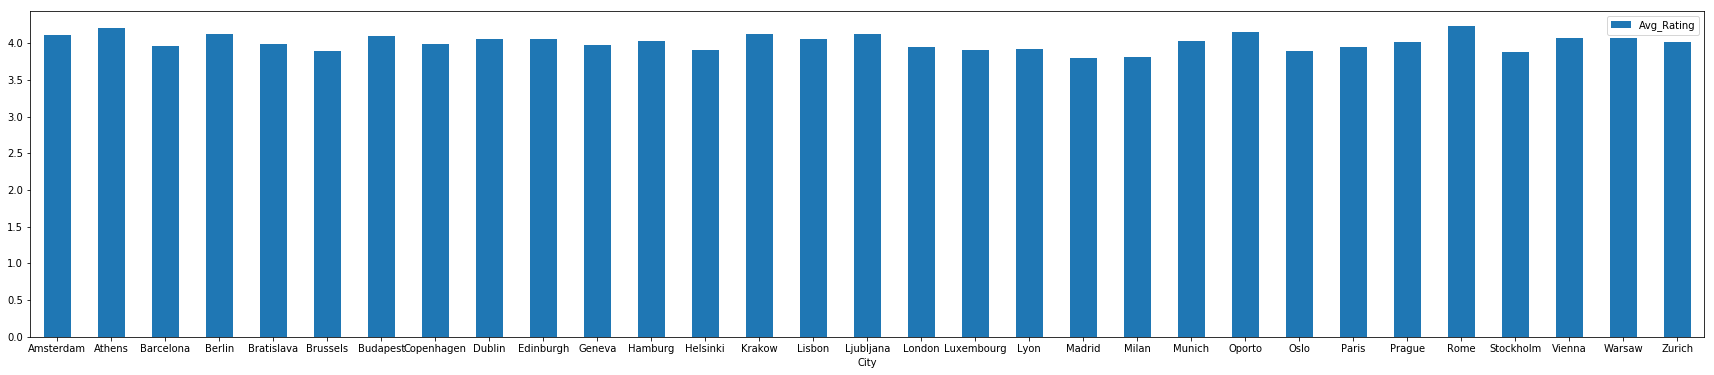

In [176]:
data_RQ1.plot.bar(x='City', y='Avg_Rating', rot=0, figsize=(30,6))

In [177]:
print('Lowest Average Rating: {:.3f}'.format(min(data_RQ1.Avg_Rating)))
print('Highest Average Rating: {:.3f}'.format(max(data_RQ1.Avg_Rating)))
print('Difference from lowest to highest average Rating: {:.3f}'.format(max(data_RQ1.Avg_Rating) - min(data_RQ1.Avg_Rating)))

Lowest Average Rating: 3.797
Highest Average Rating: 4.232
Difference from lowest to highest average Rating: 0.435


#### As it can clearly be seen, there is a difference in average ratings by citiy. The highest average rating is 4.232 for the city of Rome and 3.797 for the city of Madrid. An interesting follow-up question would be, wether the general quality of restaurants is better in Rome or if reviewers give better ratings in Rome compared to Madrid. Another more vague explaination would be that Tripadvisor is more often used by Tourists than locals, and that tourists rate Italian food better, as they are better used to it since it is better known in the world compared to spanish food.

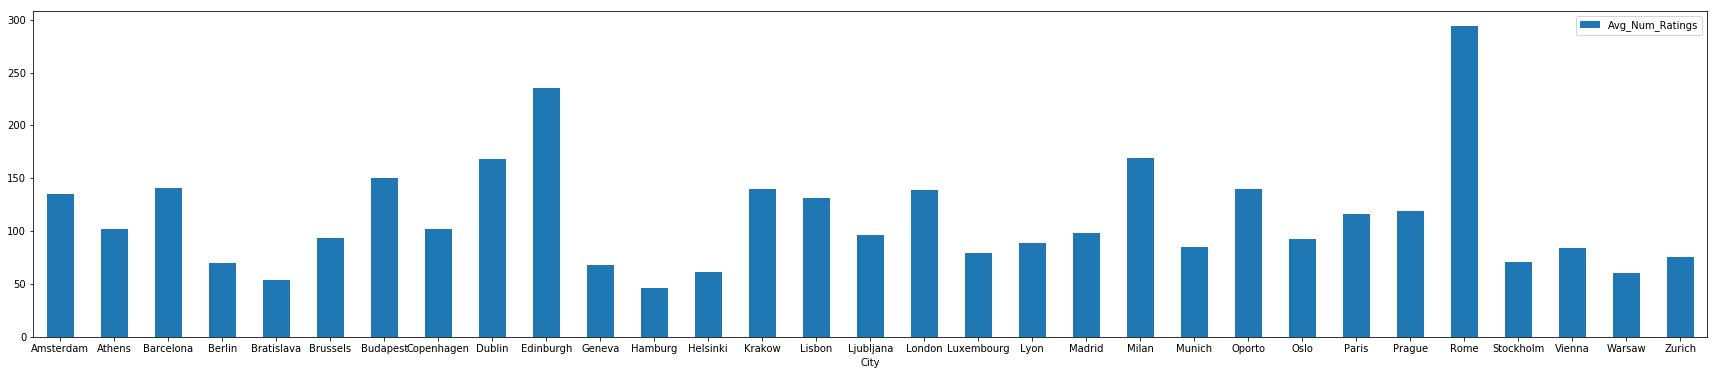

In [178]:
data_RQ1.plot.bar(x='City', y='Avg_Num_Ratings', rot=0, figsize=(30,6))

In [179]:
print('Lowest Average Number of Ratings: {:.3f}'.format(min(data_RQ1.Avg_Num_Ratings)))
print('Highest Average Number of Ratings: {:.3f}'.format(max(data_RQ1.Avg_Num_Ratings)))
print('Difference from lowest to highest number of Ratings: {:.3f}'.format(max(data_RQ1.Avg_Num_Ratings) - min(data_RQ1.Avg_Num_Ratings)))

Lowest Average Number of Ratings: 45.942
Highest Average Number of Ratings: 293.896
Difference from lowest to highest number of Ratings: 247.954


#### Also with the number of ratings it can be noted, that there definitely is a a difference in number of ratings. The highest average number of ratings with 293.896 is (again) seen in the city of Rome, while Hamburg with 45.942 has the lowest average number of ratings, which makes up of a difference of close to 248 in average ratings - that means rome has 6 times the average number of ratings as Hamburg, which can't be explained by the difference in inhabitants, which is 2.872.800 for Rome (Wikipedia) and 1.841.179 for Hamburg (Wikipedia). Other explainations would be that certain regions are more rating-friendly, prefer Tripadvisor or other tools such as Google Maps or that the probably higher number of tourists in Rome uses Tripadvisor more often.

### RQ 2: Are there more vegetarian-friendly cities and if so, are they locally concentrated?

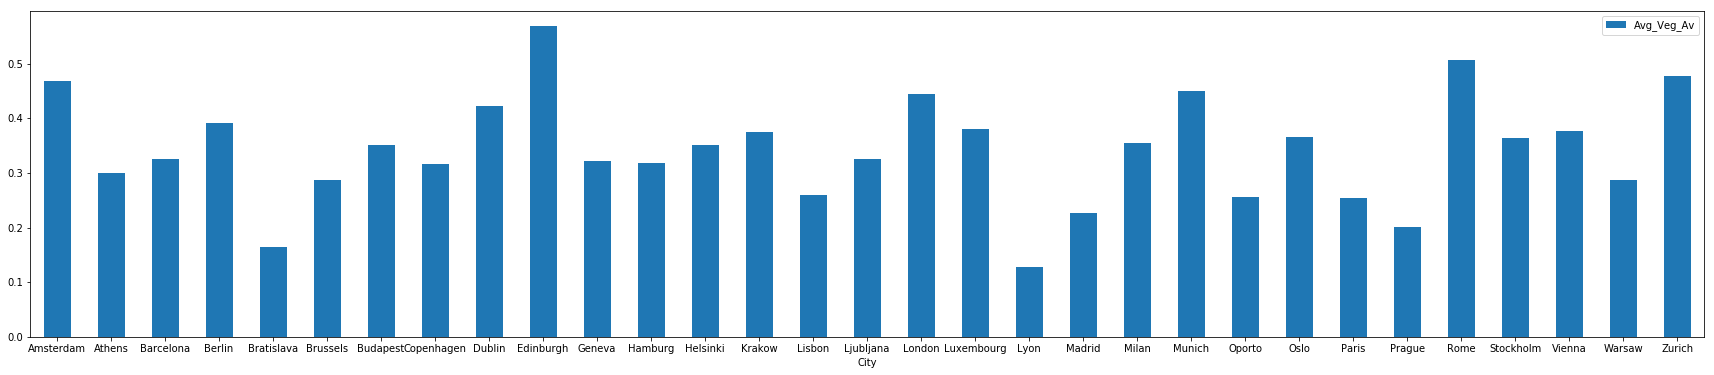

In [180]:
data_RQ1.plot.bar(x='City', y='Avg_Veg_Av', rot=0, figsize=(30,6))

In [181]:
print('Lowest Average Number of Vegetarian/Vegan Available: {:.3f}'.format(min(data_RQ1.Avg_Veg_Av)))
print('Highest Average Number of Vegetarian/Vegan Available: {:.3f}'.format(max(data_RQ1.Avg_Veg_Av)))
print('Difference from lowest to highest number: {:.3f}'.format(max(data_RQ1.Avg_Veg_Av) - min(data_RQ1.Avg_Veg_Av)))

Lowest Average Number of Vegetarian/Vegan Available: 0.129
Highest Average Number of Vegetarian/Vegan Available: 0.569
Difference from lowest to highest number: 0.440


#### It seems that there are also great differences in average number of restaurants with vegetarian/vegan option available: Edinburgh has the highest number of restaurants that offer veg, with 56.9%, Lyon on the other hand with 12,9% is a lot less veg-friendly. A clear local pattern can not be distinguished.

### RQ 3: Is local cuisine rated better than foreign cusine and if so, is there a difference between cities?

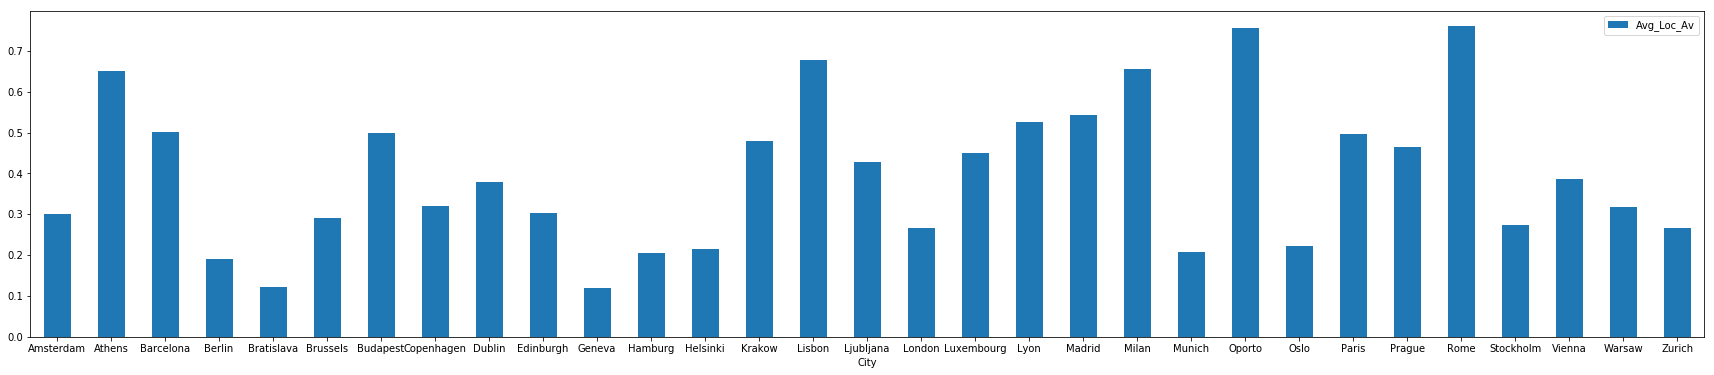

In [182]:
data_RQ1.plot.bar(x='City', y='Avg_Loc_Av', rot=0, figsize=(30,6))

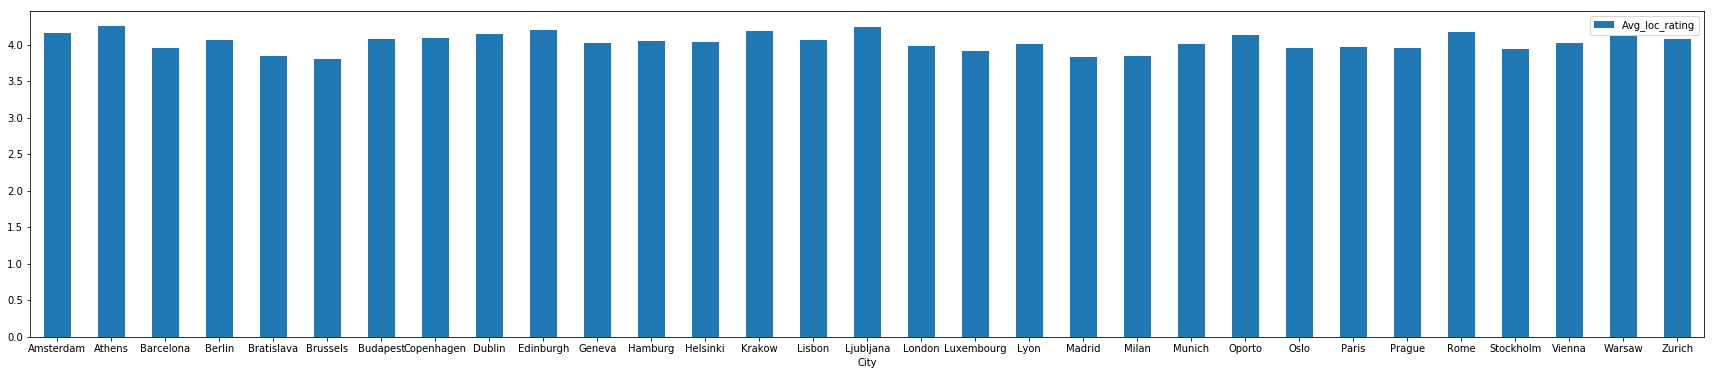

In [183]:
data_RQ1.plot.bar(x='City', y='Avg_loc_rating', rot=0, figsize=(30,6))

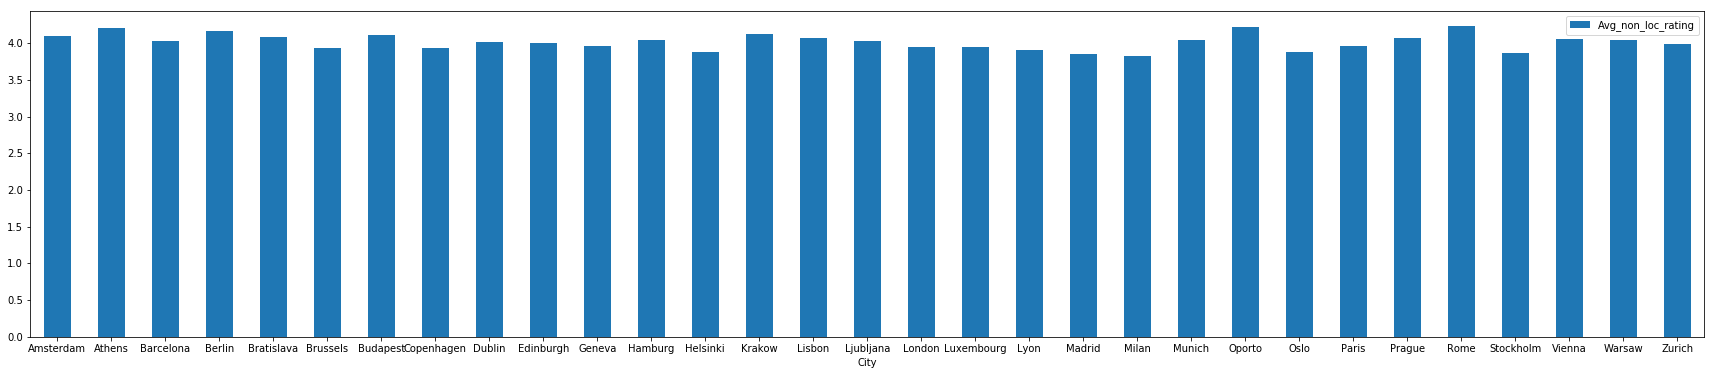

In [184]:
data_RQ1.plot.bar(x='City', y='Avg_non_loc_rating', rot=0, figsize=(30,6))

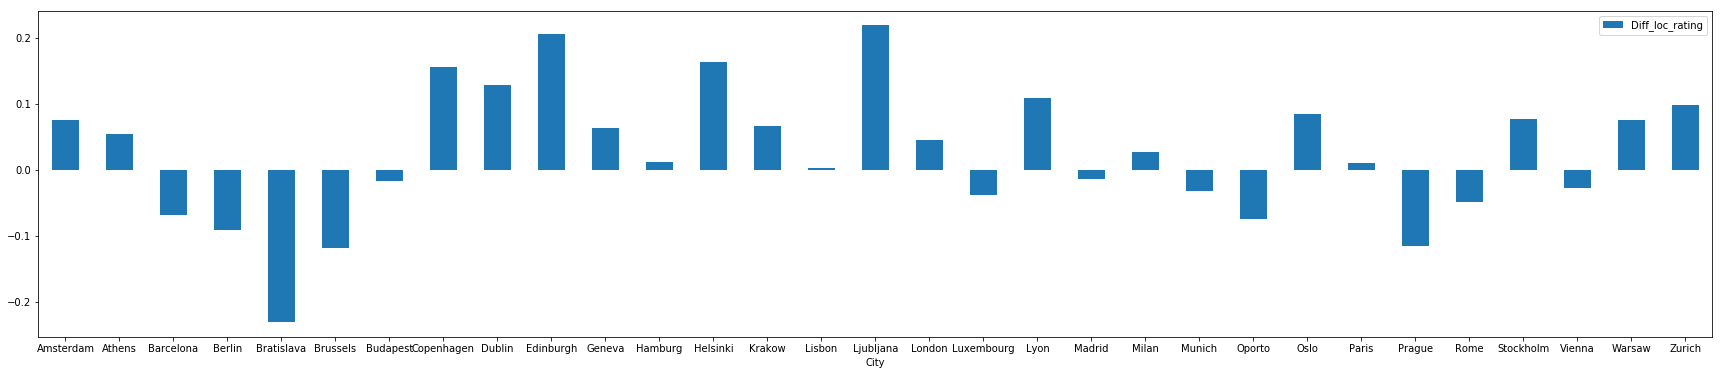

In [185]:
data_RQ1.plot.bar(x='City', y='Diff_loc_rating', rot=0, figsize=(30,6))


In [190]:
print('Lowest Rating Difference: {:.3f}'.format(min(data_RQ1.Diff_loc_rating)))
print('Highest Rating Difference: {:.3f}'.format(max(data_RQ1.Diff_loc_rating)))
print('Average Total Rating Difference: {:.3f}'.format(np.mean(data_RQ1.Diff_loc_rating)))
print()
print('Total Local Ratings: {}'.format(len(total_local_rating)))
print('Total Local Rating Mean: {}'.format(np.mean(total_local_rating)))
print('Total Non-Local Ratings: {}'.format(len(total_non_local_rating)))
print('Total Non-Local Rating Mean: {}'.format(np.mean(total_non_local_rating)))
print('Total Non-Local Rating Mean Difference: {}'.format(np.mean(total_local_rating) - np.mean(total_non_local_rating)))

Lowest Rating Difference: -0.231
Highest Rating Difference: 0.220
Average Total Rating Difference: 0.026

Total Local Ratings: 38385
Total Local Rating Mean: 4.0122052885241635
Total Non-Local Ratings: 50664
Total Non-Local Rating Mean: 3.9966248223590717
Total Non-Local Rating Mean Difference: 0.015580466165091789


#### Although there is a difference with local restaurants being rated better than restaurants not serving local food (aggregated difference is 0.026 / total difference is 0.0155), it is quite small and not neccessarily statistically significant in general. Yet it is interesting to notive, that for some cities the hypothesis is true. Especially Copenhagen, Edicnburgh, Helsinki, Ljubliana and Lyana show more significant differences with local restaurants being favored and cities like Barcelona, Berlin, Bratislava, Brussels and Prahgue, where local restaurants are rated less good, in the case of Bratislava the difference is greater than 0.2.

So, again, this can have multiple reasons. It is possible that people who use Tripadvisor, which are often tourists, prefer certain cousines that they are familiar to. Also it is possible, that certain local cuisines are "easier" for the non local. Other reasons are thinkable.